<a href="https://colab.research.google.com/github/mlian4/BDIFinal-CovidVaccine/blob/main/BDI_Independent_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyze and Visualize Covid-19 World Vaccination Progress
*   Author: Michelle Lian
*   Dataset updated by: Gabriel Preda 


*   Dateset last updated: 5/8/2021





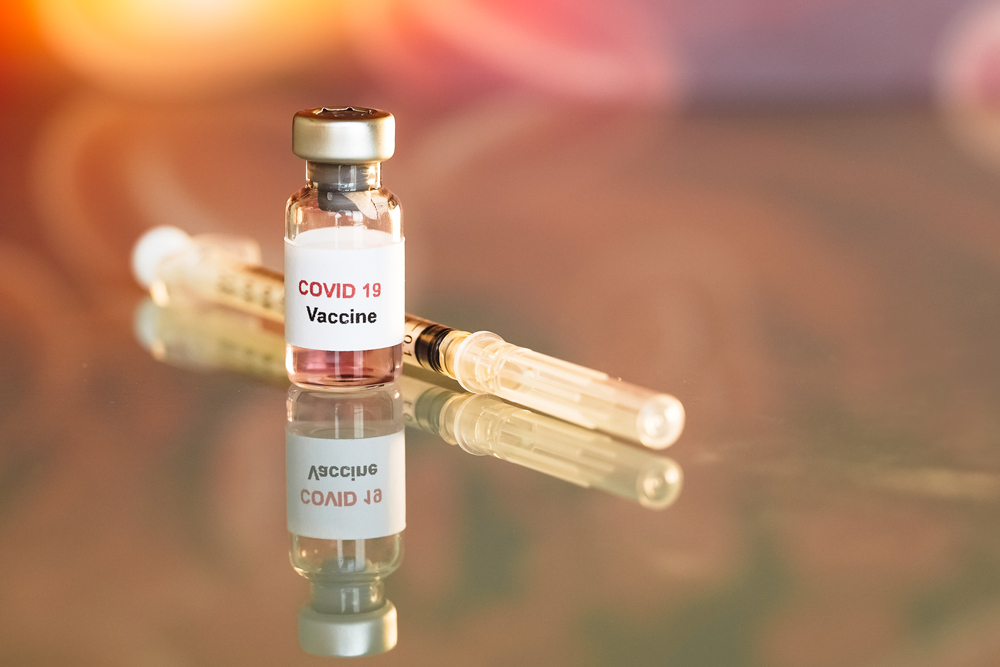

# Case Overview 

# The Dataset 
The dataset used is collected and updated daily from Our World in Data Github repository 
#Content 


*   Country 
*   Country ISO code

*   Total number of vaccinations 
*   Total number of people vaccinated 


*   Total number of people fully vaccinated 
*   Daily vaccinations 


*   Total vaccinations per hundred 
*   Total number of people vaccinated per hundred

*   Total number of people fully vaccinated per hundred
*   Number of vaccinations per day

*   Daily vaccinations per million
*   Vaccines used in the country 

*   Source name 
*   Source website














# Goal 
Find out the current progress of vaccine distribution around the world through some key questions:


*   What countries are furthest amoung vaccine distribution?
*   What are the most used vaccine (type/manufacturer) in different country ?


*   What are some of the relationship between number of vaccinations and toal number of people vaccinated?
*   Are there discrepancies between number of people vaccinated and total number of people fully vaccinated?







#Import Packages 


In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install plotly==4.14.3

In [2]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go

#Import Dataset 

In [3]:
df=pd.read_csv("https://github.com/mlian4/BDIFinal-CovidVaccine/blob/main/country_vaccinations.csv.zip?raw=true", compression='zip',encoding="ISO-8859-1")
    

df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15661,Zimbabwe,ZWE,2021-05-02,524199.0,430068.0,94131.0,3900.0,19169.0,3.53,2.89,0.63,1290.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15662,Zimbabwe,ZWE,2021-05-03,537516.0,437751.0,99765.0,13317.0,17987.0,3.62,2.95,0.67,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15663,Zimbabwe,ZWE,2021-05-04,559777.0,452191.0,107586.0,22261.0,17977.0,3.77,3.04,0.72,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15664,Zimbabwe,ZWE,2021-05-05,576233.0,461023.0,115210.0,16456.0,16889.0,3.88,3.10,0.78,1136.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...


# Part 1: Summary of Dateset 

In [4]:
num_rows=df.shape[0]
num_cols=df.shape[1]

print('total number of rows in the dataset=',num_rows)
print('total number of columns in the dataset=',num_cols)

total number of rows in the dataset= 15666
total number of columns in the dataset= 15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15666 entries, 0 to 15665
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              15666 non-null  object 
 1   iso_code                             15666 non-null  object 
 2   date                                 15666 non-null  object 
 3   total_vaccinations                   9437 non-null   float64
 4   people_vaccinated                    8754 non-null   float64
 5   people_fully_vaccinated              6502 non-null   float64
 6   daily_vaccinations_raw               7928 non-null   float64
 7   daily_vaccinations                   15465 non-null  float64
 8   total_vaccinations_per_hundred       9437 non-null   float64
 9   people_vaccinated_per_hundred        8754 non-null   float64
 10  people_fully_vaccinated_per_hundred  6502 non-null   float64
 11  daily_vaccinations_per_milli

#Part 2: Analyticals



*   Browse through data






In [6]:
first_few_rows=df.head(10)
display(first_few_rows)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,41.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,46.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,52.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [7]:
last_few_rows=df.tail(10)
display(last_few_rows)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
15656,Zimbabwe,ZWE,2021-04-27,433939.0,370676.0,63263.0,22329.0,15562.0,2.92,2.49,0.43,1047.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15657,Zimbabwe,ZWE,2021-04-28,458013.0,388021.0,69992.0,24074.0,17860.0,3.08,2.61,0.47,1202.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15658,Zimbabwe,ZWE,2021-04-29,477597.0,400771.0,76826.0,19584.0,17971.0,3.21,2.70,0.52,1209.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15659,Zimbabwe,ZWE,2021-04-30,500342.0,414735.0,85607.0,22745.0,19194.0,3.37,2.79,0.58,1291.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15660,Zimbabwe,ZWE,2021-05-01,520299.0,428135.0,92164.0,19957.0,21171.0,3.50,2.88,0.62,1424.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15661,Zimbabwe,ZWE,2021-05-02,524199.0,430068.0,94131.0,3900.0,19169.0,3.53,2.89,0.63,1290.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15662,Zimbabwe,ZWE,2021-05-03,537516.0,437751.0,99765.0,13317.0,17987.0,3.62,2.95,0.67,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15663,Zimbabwe,ZWE,2021-05-04,559777.0,452191.0,107586.0,22261.0,17977.0,3.77,3.04,0.72,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15664,Zimbabwe,ZWE,2021-05-05,576233.0,461023.0,115210.0,16456.0,16889.0,3.88,3.10,0.78,1136.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15665,Zimbabwe,ZWE,2021-05-06,607355.0,478174.0,129181.0,31122.0,18537.0,4.09,3.22,0.87,1247.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...


In [8]:
select_random_sample=df.sample()
display(select_random_sample)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
15138,United States,USA,2021-02-04,35203710.0,27905197.0,6926050.0,1325456.0,1287147.0,10.53,8.34,2.07,3849.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...




*   Countries where majority of the population is fully vaccinated 




In [9]:
df[df['people_fully_vaccinated_per_hundred'] > 50]['country'].unique()

array(['Falkland Islands', 'Gibraltar', 'Israel', 'Seychelles'],
      dtype=object)

In [10]:
df[(df['people_fully_vaccinated_per_hundred'] > 50) & (df['date'] == '2021-04-22')]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
5430,Gibraltar,GIB,2021-04-22,67366.0,35912.0,31454.0,NaN,164.0,199.95,106.59,93.36,4868.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/139031...
7116,Israel,ISR,2021-04-22,10379085.0,5373224.0,5005861.0,13173.0,11224.0,119.91,62.08,57.83,1297.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...


In [11]:
df[df['people_fully_vaccinated_per_hundred'] > 50]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
4714,Falkland Islands,FLK,2021-04-14,4407.0,2632.0,1775.0,NaN,12.0,126.53,75.57,50.96,3445.0,Oxford/AstraZeneca,Government of the Falkland Islands,https://www.facebook.com/FalkIandsGov/posts/44...
5392,Gibraltar,GIB,2021-03-15,47210.0,29631.0,17579.0,1074.0,500.0,140.13,87.95,52.18,14841.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/139031...
5393,Gibraltar,GIB,2021-03-16,48296.0,29667.0,18629.0,1086.0,579.0,143.35,88.06,55.29,17186.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/139031...
5394,Gibraltar,GIB,2021-03-17,49328.0,29749.0,19579.0,1032.0,633.0,146.41,88.30,58.11,18788.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/139031...
5395,Gibraltar,GIB,2021-03-18,49981.0,29834.0,20147.0,653.0,727.0,148.35,88.55,59.80,21578.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/139031...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12988,Seychelles,SYC,2021-04-23,121165.0,66497.0,54668.0,NaN,941.0,123.21,67.62,55.59,9569.0,"Oxford/AstraZeneca, Sinopharm/Beijing",Extended Programme for Immunisation,https://www.facebook.com/mohseychellesofficial...
12991,Seychelles,SYC,2021-04-26,123831.0,66583.0,57248.0,NaN,982.0,125.92,67.71,58.21,9986.0,"Oxford/AstraZeneca, Sinopharm/Beijing",Extended Programme for Immunisation,https://www.facebook.com/mohseychellesofficial...
12993,Seychelles,SYC,2021-04-28,125539.0,67043.0,58496.0,NaN,925.0,127.66,68.17,59.48,9406.0,"Oxford/AstraZeneca, Sinopharm/Beijing",Extended Programme for Immunisation,https://www.facebook.com/mohseychellesofficial...
12994,Seychelles,SYC,2021-04-29,126840.0,67680.0,59160.0,1301.0,961.0,128.98,68.82,60.16,9772.0,"Oxford/AstraZeneca, Sinopharm/Beijing",Extended Programme for Immunisation,https://www.facebook.com/mohseychellesofficial...


In [12]:
df_by_country = df.groupby(['country'], as_index=False).agg({
    'people_fully_vaccinated_per_hundred': 'max'
})

df_by_country.dropna(subset=['people_fully_vaccinated_per_hundred'], inplace=True)
df_by_country.sort_values('people_fully_vaccinated_per_hundred', ascending=False, inplace=True)

df_by_country.head(20)

,country,people_fully_vaccinated_per_hundred
67,Gibraltar,102.95
158,Seychelles,60.68
85,Israel,58.60
58,Falkland Islands,50.96
32,Cayman Islands,49.47
186,United Arab Emirates,38.79
20,Bermuda,38.18
33,Chile,36.58
89,Jersey,35.14
14,Bahrain,33.05


In [13]:
top_20_total_vaccinations_country=df['country'].value_counts().head(20).index.tolist()
print(top_20_total_vaccinations_country)

['Canada', 'Russia', 'China', 'Israel', 'United States', 'Qatar', 'Bahrain', 'Chile', 'Mexico', 'Sweden', 'Slovenia', 'Germany', 'Portugal', 'Lithuania', 'Italy', 'Liechtenstein', 'Costa Rica', 'Estonia', 'Austria', 'Cayman Islands']




*   Filter out data specific to a country (US)




In [14]:
Data_US=df[df['country']=='United States']
display(Data_US)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
15092,United States,USA,2020-12-20,556208.0,556208.0,NaN,NaN,NaN,0.17,0.17,NaN,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
15093,United States,USA,2020-12-21,614117.0,614117.0,NaN,57909.0,57909.0,0.18,0.18,NaN,173.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
15094,United States,USA,2020-12-22,NaN,NaN,NaN,NaN,127432.0,NaN,NaN,NaN,381.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
15095,United States,USA,2020-12-23,1008025.0,1008025.0,NaN,NaN,150606.0,0.30,0.30,NaN,450.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
15096,United States,USA,2020-12-24,NaN,NaN,NaN,NaN,191001.0,NaN,NaN,NaN,571.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15225,United States,USA,2021-05-02,245591469.0,147047012.0,104774652.0,2127998.0,2418580.0,73.43,43.97,31.33,7232.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
15226,United States,USA,2021-05-03,246780203.0,147517734.0,105523520.0,1188734.0,2287393.0,73.79,44.11,31.55,6839.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
15227,United States,USA,2021-05-04,247769049.0,147894671.0,106168588.0,988846.0,2194483.0,74.08,44.22,31.75,6562.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
15228,United States,USA,2021-05-05,249566820.0,148562891.0,107346533.0,1797771.0,2132487.0,74.62,44.42,32.10,6376.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


#Part 3: Visualizations 

In [15]:
fig=px.histogram(df,x='people_vaccinated',y='total_vaccinations',title='total vaccinations vs. people vaccinated')
fig.show()

In [16]:
fig=px.line(df,x='date',y='people_fully_vaccinated',title='Progression of the number of fully vaccinated people')
fig.show()

In [17]:
fig=px.density_heatmap(
    df,
    x='country',
    y='people_fully_vaccinated_per_hundred',
    title='percentage of fully vaccinated people heatmap',
    height=800
)
fig.show()

In [18]:
fig=px.scatter(df,x='date',y='total_vaccinations',title='total vaccinations to date')
fig.show()

In [19]:
fig=px.scatter(df,x='people_fully_vaccinated',y='people_vaccinated',title='n')
fig.show()

In [20]:
fig=px.scatter_3d(
    df[df['country']=='United States'],
    title='total vaccinations vs. people vaccinated vs. people fully vaccinated in the US',
    x='total_vaccinations',
    y='people_vaccinated',
    z='people_fully_vaccinated',
    template='plotly_dark',
    width=800,
    height=800
)
fig.show()

#Final Verdict 

Covid-19 Vaccine: How is the current progress with vaccine distribution around the world?

To discuss the question hollistically we have to look at the problem from different angle and take into considerations the differences in technology, culture, population, people's additude towards vaccines, government's ability to purchased dosage...etc. 

Millions of covid vaccines have already been administered across the world but there are huge gaps in its progression in each country. Some countries have already vaccinated the majority of their population while some countries are still securing their supply of vaccines. 

In addition, there is a large discrepancy between the number of people vaccinated and people fully vaccinated. According to the CDC, in order to be considered fully vacccinated, one must wait 2 week after their complete dosage(s) of the vaccine they are taking.

*   2 dose for Pfizer and Moderna Vaccine
*   1 dose for Johnson and Johnson Vaccine

In conclusion, some of the countries furthest in the progress (people fully vaccinated per hundred) includes:


*   Gibraltar
*   Israel 


*   Cayman Islands
*   United States




 






